# Pyladies meetup <img src="https://raw.githubusercontent.com/pyladies/pyladies-assets/master/geek/png/pylady_geek_partial.png" style="display:inline" width="150"  align="right">
# 7. házi feladat megoldása

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
def hhead(df, n=2):
    print(df.shape)
    return df.head(n)

In [4]:
pd.set_option('display.max_rows', None)

## Segédfüggvények

In [5]:
def plot_confusion_matrix(conf_matrix, train_flg = False):
    plt.figure(figsize=(7, 3))
    sns.set(font_scale=1.2)

    plt.subplot(1, 2, 1)  
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    if train_flg == True: 
        plt.title('Train - record nums')
    else:
        plt.title('Test  - record nums')

    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix / conf_matrix.sum(), annot=True, cmap="Blues", cbar=False, square=True)

    # Add labels for the axes
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    if train_flg == True: 
        plt.title('Train  - record %')
    else:
        plt.title('Test  - record %')

    plt.show()

Az adathalmaz közel 10 év adatát tartalmazza több különböző városra. Számos magyarázó változó áll rendelkezésre, melyekhez alább találhatóak a leírások:

- **Date**: Az rekord dátuma
- **Location**: Az időjárásállomás közismert neve
- **MinTemp**: A minimális hőmérséklet Celsius-fokban
- **MaxTemp**: A maximális hőmérséklet Celsius-fokban
- **Rainfall**: A nap folyamán mért csapadék mennyisége milliméterben
- **Evaporation**: Az úgynevezett A osztályú párologtatás (mm) az éjfél előtti 24 órában
- **Sunshine**: Az napsütéses órák száma a nap folyamán
- **WindGustDir**: Az éjfél előtti 24 órában a legnagyobb szélroham iránya
- **WindGustSpeed**: Az éjfél előtti 24 órában a legnagyobb szélroham sebessége (km/h)
- **WindDir9am**: A szél iránya reggel 9-kor
- **WindDir3pm**: A szél iránya délután 3-kor
- **WindSpeed9am**: A szélsebesség (km/óra) a 9 előtti 10 perc átlagolva
- **WindSpeed3pm**: A szélsebesség (km/óra) a 3 előtti 10 perc átlagolva
- **Humidity9am**: Páratartalom (százalékban) reggel 9-kor
- **Humidity3pm**: Páratartalom (százalékban) délután 3-kor
- **Pressure9am**: Légnyomás (hPa) a tengerszintre számítva reggel 9-kor
- **Pressure3pm**: Légnyomás (hPa) a tengerszintre számítva délután 3-kor
- **Cloud9am**: A felhők által lefedett égbolt aránya reggel 9-kor. Ez "oktákban" mérve van, ami egy nyolcrészes mértékegység. Megmutatja, hány nyolcadot fednek le a felhők. Az 0 azt jelzi, hogy az égbolt teljesen derült, míg a 8 azt jelzi, hogy teljesen borult.
- **Cloud3pm**: A felhők által lefedett égbolt aránya délután 3-kor. Ez "oktákban" mérve van, ami egy nyolcrészes mértékegység. Megmutatja, hány nyolcadot fednek le a felhők. Az 0 azt jelzi, hogy az égbolt teljesen derült, míg a 8 azt jelzi, hogy teljesen borult.
- **Temp9am**: Hőmérséklet (Celsius-fok) reggel 9-kor
- **Temp3pm**: Hőmérséklet (Celsius-fok) délután 3-kor
- **RainToday**: Logikai érték: 1, ha a 24 óra alatt eső mennyiség (mm) meghaladja az 1 mm-t, különben 0
- **RainTomorrow**: Célváltozó. Azt jelzi, hogy végül esett-e 1mm-nél több eső másnap vagy sem. 

## Adathalmaz beolvasása, "állapotellenőrzés", adathibák javítása

Geeky úgy döntött, hogy hamár rendelkezésre áll a múzeum által egy adatelőkészítő kód, akkor nem áll neki magától, hanem felhasználja azt. Természetesen, ahogy futtatja a cellákat mindig megnézni, hogy mi is történik ott, hogy értse a logikát, de sok Shift+Enter kombót nyomogatva hamar eljut a "Modellezés" részhez. 

In [6]:
df = pd.read_csv('Bergengoc_eso_elorejelzes.csv')
hhead(df)

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Berhegy,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Berhegy,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [7]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,48,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Gencstavirág,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,4618,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [8]:
print(df['RainTomorrow'].value_counts())

df['RainTomorrow'].value_counts()/df.shape[0]

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


RainTomorrow
No     0.758394
Yes    0.219146
Name: count, dtype: float64

## Adatelőkészítés - Hiányzó értékek kezelése

In [9]:
df.isnull().sum() / df.shape[0]

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

### Nagyon magas hiányzó számú oszlopokat eldobjuk

In [10]:
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1, inplace = True)
df.shape

(145460, 19)

### A hiányzó értékeket feltöltjük a lokációhoz tartozó átlag / leggyakoribb értékkel

In [11]:
def fill_by_location(df, col, cat_flg = False):
    if cat_flg == False:
        df_temp = df.groupby(['Location'], as_index = False)[col].mean()
        df_temp.columns = ['Location', 'fillna_' + col]
    else:
        df_temp = df.groupby(['Location'], as_index=False)[col].agg(lambda x: x.mode().values[0] if not x.mode().empty else None)
        df_temp.columns = ['Location', 'fillna_' + col]
    
    df = df.merge(df_temp, how = 'left', on = 'Location')

    df[col] = np.where(df[col].isnull(), df['fillna_' + col], df[col])

    df.drop(['fillna_' + col], axis = 1, inplace = True)
        
    return df

In [12]:
for i in df.columns[2:-1]:
    if df[i].dtype in [float, int]:
        df = fill_by_location(df, i, cat_flg = False)
    else:
        df = fill_by_location(df, i, cat_flg = True)

df.isnull().sum()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       6079
WindGustSpeed     6079
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      12119
Pressure3pm      12119
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow      3267
dtype: int64

### Még így is maradtak hiányzó értékek, így azokat feltöltjük a globális leggyakoribb értékkel / átlaggal
> ez azért lehetséges, mert vannak olyan települések, ahol pl. az összes WindGustSpeed érték hiányzik, így a fenti függvény semmiből nem tud átlagot számolni

In [13]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace = True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace = True)

df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace = True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace = True)

df.isnull().sum() / df.shape[0]


Date             0.00000
Location         0.00000
MinTemp          0.00000
MaxTemp          0.00000
Rainfall         0.00000
WindGustDir      0.00000
WindGustSpeed    0.00000
WindDir9am       0.00000
WindDir3pm       0.00000
WindSpeed9am     0.00000
WindSpeed3pm     0.00000
Humidity9am      0.00000
Humidity3pm      0.00000
Pressure9am      0.00000
Pressure3pm      0.00000
Temp9am          0.00000
Temp3pm          0.00000
RainToday        0.00000
RainTomorrow     0.02246
dtype: float64

### A célváltozóban is vannak hiányzó értékek. Mivel az a célváltozónk, így ezeket a rekordokat eldobjuk

In [14]:
df.dropna(how = 'any', inplace = True)
df.shape

(142193, 19)

### Az egyszerűség kedvéért a kategorikus változókat most eldobjuk. 

In [15]:
df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1, inplace = True)

### A flag (binary) tipusú mezőket számértékűre cseréljük

In [16]:
df['RainToday'] = np.where(df['RainToday'] == 'No', 0, 1)
df['RainTomorrow'] = np.where(df['RainTomorrow'] == 'No', 0, 1)

### Adathalmaz ellenőrzése, hogy megfelel-e a modellezésre (nincs benne hiánzó adat, és számértékű adatokat tartalmaz)

- a Date és Location mezők benne maradtak, de azok lényegében együttes IDnak is tekinthetőek

In [17]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,142193,142193,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
unique,3436,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2013-12-01,Gencstavirág,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,49,4592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.188651,23.227178,2.352051,40.018361,13.990242,18.590425,68.900172,51.655391,1017.642381,1015.250859,16.962351,21.692726,0.221213,0.224181
std,NaN,NaN,6.394098,7.111665,8.423794,13.146024,8.861090,8.747492,18.957451,20.601434,6.748998,6.683682,6.495564,6.910927,0.415065,0.417043
min,NaN,NaN,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000
25%,NaN,NaN,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000,0.000000
50%,NaN,NaN,12.000000,22.600000,0.000000,39.000000,13.000000,18.993498,70.000000,52.000000,1017.639751,1015.251719,16.700000,21.200000,0.000000,0.000000
75%,NaN,NaN,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,66.000000,1021.800000,1019.400000,21.500000,26.400000,0.000000,0.000000


In [18]:
df.to_csv('BGG_idojaras_tisztitott.csv', index=False)


## Modellezés

Geeky úgy döntött készít magának egy tervet, hogy milyen módon állna neki a feladatnak, így azt gyorsan papírra is vetette:
- Először szét kell szedni train-test (és X-y) halmazokra az adatot. 30% lesz a test halmaz. 
- Alap modell:
    - Alapértelmezett döntési fa --> ez lesz egy base modell, viszonyítási alapként szolgál a későbbi modellekhez
    - Az alap modellhez különféle metrikák kiszámítása:
        - AUC
        - ROC
        - Konfúziós mátrix
        - Klasszifikációs riport
    - Feature importance az alap modellhez, hogy lássa mik a lényeges változók
- A fentiek mégegyszer, annyi különbséggel, hogy nem a döntési fa alapbeállításait használja, hanem a mélységét (max_depth) és a levél méretét (min_sample_leaf) állítgatva megpróbálja a legjobb - de legalábbis elég jó - modellt megcsinálni. A végén ezt a modellt még ki is rajzolja. Geeky úgy dönt, hogy a számára legmegfelelőbb formában azt is vezetni fogja, hogy milyen hiperparaméter kombinációkat próbált már ki. 

- A kiválasztott modellhez ír majd egy magyarázatot, hogy mi alapján gondolja, hogy ez egy jó modell. 

In [19]:
df = pd.read_csv('BGG_idojaras_tisztitott.csv')
print(df.shape)
df.describe(include='all')

(142193, 16)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,142193,142193,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
unique,3436,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2013-12-01,Gencstavirág,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,49,4592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.188651,23.227178,2.352051,40.018361,13.990242,18.590425,68.900172,51.655391,1017.642381,1015.250859,16.962351,21.692726,0.221213,0.224181
std,NaN,NaN,6.394098,7.111665,8.423794,13.146024,8.861090,8.747492,18.957451,20.601434,6.748998,6.683682,6.495564,6.910927,0.415065,0.417043
min,NaN,NaN,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000
25%,NaN,NaN,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000,0.000000
50%,NaN,NaN,12.000000,22.600000,0.000000,39.000000,13.000000,18.993498,70.000000,52.000000,1017.639751,1015.251719,16.700000,21.200000,0.000000,0.000000
75%,NaN,NaN,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,66.000000,1021.800000,1019.400000,21.500000,26.400000,0.000000,0.000000


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Date', 'Location', 'RainTomorrow'], axis = 1),
                                                    df['RainTomorrow'],
                                                    test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(99535, 13) (42658, 13)
(99535,) (42658,)


In [21]:
# ellenőrizzük a célváltozó eloszlását a tanító és teszt adatokban
display(y_train.value_counts() / y_train.shape[0])
display(y_test.value_counts() / y_test.shape[0])

RainTomorrow
0    0.775436
1    0.224564
Name: count, dtype: float64

RainTomorrow
0    0.776712
1    0.223288
Name: count, dtype: float64

## Alapértelmezett döntési fa

In [22]:
dt_base = DecisionTreeClassifier(random_state=42)   # létrehozzuk a modell objektumot
dt_base.fit(X_train, y_train)                       # betanítjuk a modellt

DecisionTreeClassifier(random_state=42)

In [23]:
base_train_pred_pro = dt_base.predict_proba(X_train)    # így egy valószínűséget (probability) ad vissza a modell
base_train_pred_cat = dt_base.predict(X_train)          # így egy cimkét ad vissza a modell

base_test_pred_pro = dt_base.predict_proba(X_test)      
base_test_pred_cat = dt_base.predict(X_test)            

print('teszt predikció - valószínűség:', base_test_pred_pro[0:5])
print('teszt predikció - címke:', base_test_pred_cat[0:5])


teszt predikció - valószínűség: [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
teszt predikció - címke: [1 1 0 1 1]


## Alapértelmezett döntési fa teljesítményének értékelése

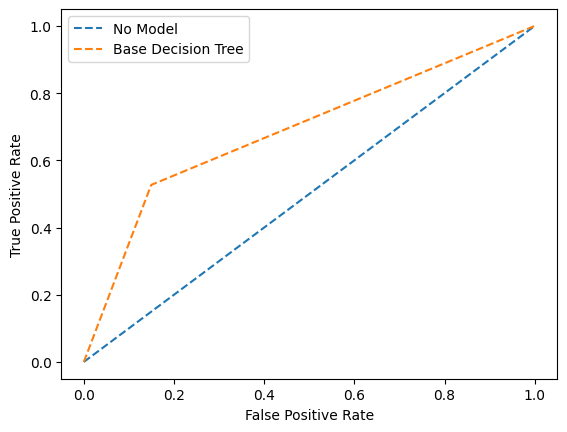

train auc 0.9999999886969261
test auc 0.6886935204991448


In [24]:
# ROC görbe és AUC érték

pred0_test = [y_train.mean()] * len(y_test)
nm_fpr, nm_tpr, _ = roc_curve(y_test, pred0_test)                           # calculate the FPR and TPR for the "avg"pred

dt_b_fpr, dt_b_tpr, _ = roc_curve(y_test, base_test_pred_pro[:, 1])         # calculate the FPR and TPR for model's pred

plt.plot(nm_fpr, nm_tpr, linestyle='--', label='No Model')                  # plot the roc curve for the "avg" prediction
plt.plot(dt_b_fpr, dt_b_tpr, linestyle='--', label='Base Decision Tree')    # plot the roc curve for the model

plt.xlabel('False Positive Rate')                                           
plt.ylabel('True Positive Rate')                                            
plt.legend()                                                                
plt.show()                                                                  

print('train auc', roc_auc_score(y_train, base_train_pred_pro[:,1]))
print('test auc', roc_auc_score(y_test, base_test_pred_pro[:,1]))

### <span style="color:green"> Az ROC görbét és a hozzá tartozó AUC értékeket nézve megállapítható, hogy</span>
> 1) a modell jobban teljesít, mint a random előrejelzés, viszont még elég távol van a legjobb teljesítménytől (FPR=0, TPR=1); 
> 2) a train halmazon az AUC érték szinte tökéletes, ami azt sugallja, hogy a modell talán túltanulhatott; 
> 3) a test halmazon az AUC érték 0.6887, ami elfogadható, de nem a legjobb
> 4) a két AUC érték közti különbség 0.3113, ami viszonylag nagynak számít, és szintén megerősíti, hogy a modell   túltanulhatott a train halmazon, és nem általánosít jól az új, ismeretlen adatokra</span>

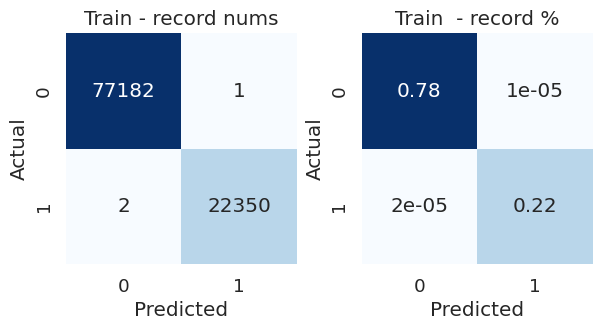

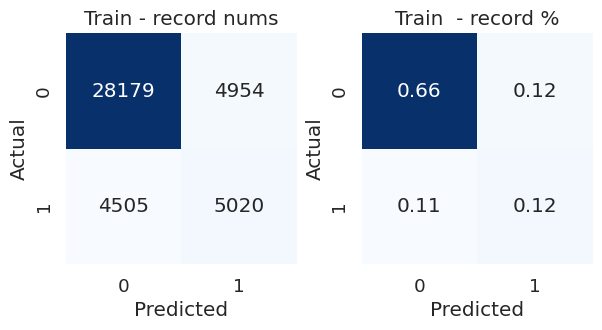

In [25]:
# konfúziós mátrixok

plot_confusion_matrix(confusion_matrix(y_train, base_train_pred_cat), True)
plot_confusion_matrix(confusion_matrix(y_test, base_test_pred_cat), True)


### <span style="color:green"> A konfúziós mátrixokat nézve megállapítható, hogy </span>
> 1) a train halmazon a modell majdnem tökéletes eredményt adott, azonban ez nem jelent jót, mert a test halmazon már nem ilyen jók az eredmények, ami megint csak túltanulásra utal
> 2) szembetűnő, hogy a test halmazon nagy a false negative és még több a false pozitive előrejelzések száma >> ez utóbbiból úgy tűnik, különösen a pozitív osztály besorolásaival van gondja a modellnek (azaz a valóban esős napokon nehezen boldogul az előrejelzéssel)

In [26]:
# klasszifikációs riport

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Klasszifikációs Riport:\n")
print(classification_report(y_test, base_test_pred_cat))

accuracy = accuracy_score(y_test, base_test_pred_cat)

print("\nAccuracy:", accuracy)

Klasszifikációs Riport:

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     33133
           1       0.50      0.53      0.51      9525

    accuracy                           0.78     42658
   macro avg       0.68      0.69      0.69     42658
weighted avg       0.78      0.78      0.78     42658


Accuracy: 0.7782596464906935


### <span style="color:green"> A klasszifikációs riportot nézve megállapítható, hogy </span>
> 1) az accuracy (pontosság) 0.7783, ami azt jelenti, hogy a modell a mintánk 77.83%-át helyesen osztályozta be a test halmazon - ez az érték elfogadható, de lehetne jobb is;
> 2) szembetűnő, hogy a precision és recall értékek a pozitív (1-es) osztályra nagyon alacsonyak (0.50 és 0.53) - ez megint azt jelzi, hogy a modell gyakran téveszt, amikor a pozitív osztályba próbál egy mintát besorolni - azaz nehézségei vannak a ritkábban előforduló esős napok pontos előrejelzésével

In [27]:
# feature importance lekérése, hogy lássuk melyik változókat érdemes használnunk 
# a módosított döntési fában, illetve melyikeket nem

pd.DataFrame({'features': X_train.columns, 
              'importance': dt_base.feature_importances_}).sort_values(['importance'], ascending=False)

# a 'RainToday' változónak nagyon alacsony a fontossága, így azt a módosított döntési fában nem fogjuk felhasználni

,features,importance
7,Humidity3pm,0.291051
9,Pressure3pm,0.089782
3,WindGustSpeed,0.083795
8,Pressure9am,0.068629
0,MinTemp,0.067279
10,Temp9am,0.064834
6,Humidity9am,0.062339
1,MaxTemp,0.058374
2,Rainfall,0.057148
11,Temp3pm,0.055827


In [28]:
# alapértelmezett döntési fa mélységének és leveleinek száma

print("Fa mélysége:",dt_base.get_depth())
print("Fa leveleinek a száma:", dt_base.get_n_leaves())

Fa mélysége: 36
Fa leveleinek a száma: 12844


## Módosított döntési fa építése

In [29]:
# újradefiniáljuk a train és test halmazokat, mostmár a 'RainToday' oszlop nélkül

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Date', 'Location', 'RainToday', 'RainTomorrow'], axis = 1),
                                                    df['RainTomorrow'],
                                                    test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(99535, 12) (42658, 12)
(99535,) (42658,)


### <span style="color:green"> Az optimális hiperparaméter beállítások megtalálása (és ennek a folyamatnak a dokumentálása) érdekében az alábbi lépéseket követjük:</span>

> 1) írunk egy for ciklust ami egyrészt a max_depth értékekkel végig iterál egy range(1,37,4) halmazon, 
> 2) másrészt ezen belül egy másik for ciklust, ami a min_samples_leaf értékekkel végig iterál egy range(1,1001,50) halmazon
> 3) közben minden egyes iterációban kiszámítja nekünk a következő értékeket:
      - a test halmaz elemei által kirajzolódó ROC görbe "csúcsának" koordinátái (a FPR=0, TPR=1 ponthoz legközelebbi pontot tekintsük most a görbe "csúcsának")
      - AUC értékek különbsége (train_AUC - test_AUC)
      - accuracy érték a test halmazon
> 4) végül ezeket az értékeket egy df-ben összegzi minden kombinációhoz, 
> 5) amit aztán először az accuracy értékek szerint csökkenő, majd az AUC_diff értékek szerint növekvő sorrendbe rendezünk


In [30]:
results = []

for depth in range(1, 37, 4):
    for leaf in range(1, 1001, 50):

        dt_m = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=42)
        dt_m.fit(X_train, y_train)
        
        train_probs = dt_m.predict_proba(X_train)[:, 1]
        test_probs = dt_m.predict_proba(X_test)[:, 1]
        test_preds = dt_m.predict(X_test)
        
        train_auc = roc_auc_score(y_train, train_probs)
        test_auc = roc_auc_score(y_test, test_probs)
        auc_diff = train_auc - test_auc
        acc = accuracy_score(y_test, test_preds)
        
        fpr, tpr, _ = roc_curve(y_test, test_probs)
        distances = (fpr**2 + (1-tpr)**2)**0.5
        closest_point_index = np.argmin(distances)
        roc_top_left = (round(fpr[closest_point_index], 2), round(tpr[closest_point_index], 2))
        
        results.append({'max_depth': depth, 'min_samples_leaf': leaf, 
                        'roc_top_left': roc_top_left, 'auc_diff': auc_diff, 
                        'accuracy': acc})

results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values(by=['accuracy', 'auc_diff',], ascending=[False, True])

sorted_results


,max_depth,min_samples_leaf,roc_top_left,auc_diff,accuracy
46,9,301,"(0.23, 0.76)",0.012746,0.839303
66,13,301,"(0.23, 0.76)",0.015198,0.839303
86,17,301,"(0.23, 0.76)",0.015534,0.839303
106,21,301,"(0.23, 0.76)",0.015534,0.839303
126,25,301,"(0.23, 0.76)",0.015534,0.839303
146,29,301,"(0.23, 0.76)",0.015534,0.839303
166,33,301,"(0.23, 0.76)",0.015534,0.839303
47,9,351,"(0.22, 0.75)",0.012110,0.839186
67,13,351,"(0.23, 0.76)",0.014439,0.839186
87,17,351,"(0.23, 0.76)",0.014590,0.839186


### <span style="color:green"> A fenti keresésből úgy tűnik, hogy a vizsgált lehetőségek közül a legoptimálisabb döntési fa mélysége 9 körül van, minimum levél nagysága pedig 300 körüli </span>

> módosítsuk az eredeti range()-eket ezen értékek körülire, hátha találunk még jobban teljesítő fát

In [31]:
results = []

for depth in range(7, 12):
    for leaf in range(250, 350, 10):

        dt_m = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=42)
        dt_m.fit(X_train, y_train)
        
        train_probs = dt_m.predict_proba(X_train)[:, 1]
        test_probs = dt_m.predict_proba(X_test)[:, 1]
        test_preds = dt_m.predict(X_test)
        
        train_auc = roc_auc_score(y_train, train_probs)
        test_auc = roc_auc_score(y_test, test_probs)
        auc_diff = train_auc - test_auc
        acc = accuracy_score(y_test, test_preds)
        
        fpr, tpr, _ = roc_curve(y_test, test_probs)
        distances = (fpr**2 + (1-tpr)**2)**0.5
        closest_point_index = np.argmin(distances)
        roc_top_left = (round(fpr[closest_point_index], 2), round(tpr[closest_point_index], 2))
        
        results.append({'max_depth': depth, 'min_samples_leaf': leaf, 
                        'roc_top_left': roc_top_left, 'auc_diff': auc_diff, 
                        'accuracy': acc})

results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values(by=['accuracy', 'auc_diff',], ascending=[False, True])

sorted_results


,max_depth,min_samples_leaf,roc_top_left,auc_diff,accuracy
15,8,300,"(0.24, 0.77)",0.011377,0.839303
13,8,280,"(0.24, 0.77)",0.012201,0.839303
25,9,300,"(0.23, 0.76)",0.012823,0.839303
23,9,280,"(0.23, 0.76)",0.013409,0.839303
35,10,300,"(0.24, 0.77)",0.013899,0.839303
45,11,300,"(0.24, 0.77)",0.014466,0.839303
33,10,280,"(0.24, 0.77)",0.014629,0.839303
43,11,280,"(0.24, 0.77)",0.015584,0.839303
14,8,290,"(0.24, 0.76)",0.011961,0.839233
24,9,290,"(0.23, 0.76)",0.013057,0.839233


### <span style="color:green"> A fentiek alapján a módosított döntési fa mélysége legyen 8, leveleinek minimum nagysága pedig 300 </span>
> hiszen a második iterációnál (a range()-ek szűkítése után) nem javult jelentős mértékben a modell teljesítménye

In [32]:
# építsük fel a modellt, és tanítsuk be az új train halmazon

dt_mod = DecisionTreeClassifier(max_depth=8, min_samples_leaf=300, random_state=42)
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=300, random_state=42)

In [33]:
# prediktáljunk a modell segítségével

mod_test_pred_pro = dt_mod.predict_proba(X_test)      
mod_test_pred_cat = dt_mod.predict(X_test)            

mod_train_pred_pro = dt_mod.predict_proba(X_train)    
mod_train_pred_cat = dt_mod.predict(X_train)          

print('teszt predikció - valószínűség:', mod_test_pred_pro[0:5])
print('teszt predikció - címke:', mod_test_pred_cat[0:5])


teszt predikció - valószínűség: [[0.06610169 0.93389831]
 [0.59234234 0.40765766]
 [0.9765625  0.0234375 ]
 [0.64756447 0.35243553]
 [0.51552795 0.48447205]]
teszt predikció - címke: [1 0 0 0 0]


## Módosított döntési fa teljesítményének értékelése

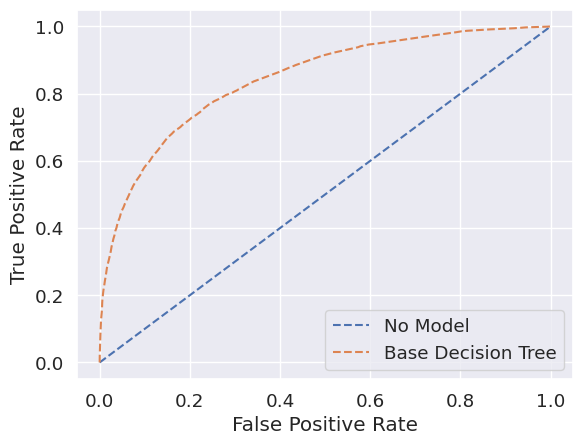

train auc 0.8544240175653339
test auc 0.8430472240527777


In [34]:
# ROC görbe és AUC érték

pred0_test = [y_train.mean()] * len(y_test)
nm_fpr, nm_tpr, _ = roc_curve(y_test, pred0_test)

dt_m_fpr, dt_m_tpr, _ = roc_curve(y_test, mod_test_pred_pro[:, 1])

plt.plot(nm_fpr, nm_tpr, linestyle='--', label='No Model')                  
plt.plot(dt_m_fpr, dt_m_tpr, linestyle='--', label='Base Decision Tree')

plt.xlabel('False Positive Rate')                                           
plt.ylabel('True Positive Rate')                                            
plt.legend()                                                                
plt.show()                                                                  

print('train auc', roc_auc_score(y_train, mod_train_pred_pro[:,1]))
print('test auc', roc_auc_score(y_test, mod_test_pred_pro[:,1]))

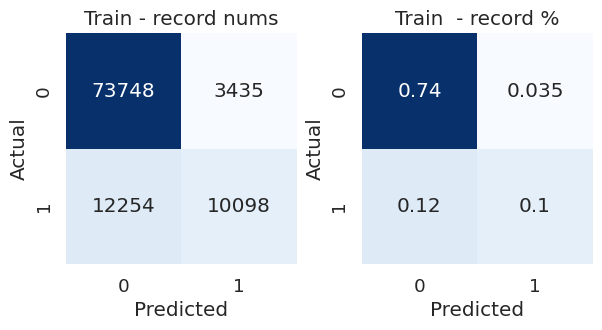

In [35]:
# konfúziós mátrixok

plot_confusion_matrix(confusion_matrix(y_train, mod_train_pred_cat), True)


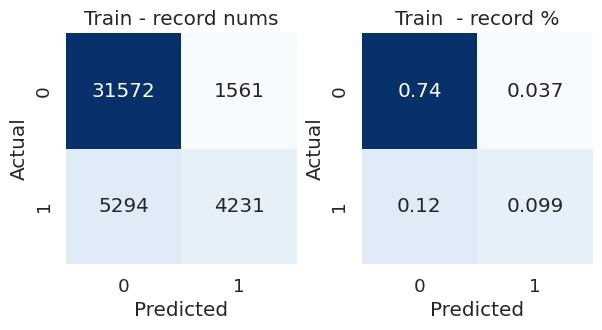

In [36]:
plot_confusion_matrix(confusion_matrix(y_test, mod_test_pred_cat), True)


In [37]:
# klasszifikációs riport

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Klasszifikációs Riport:\n")
print(classification_report(y_test, mod_test_pred_cat))

accuracy = accuracy_score(y_test, mod_test_pred_cat)

print("\nAccuracy:", accuracy)

Klasszifikációs Riport:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33133
           1       0.73      0.44      0.55      9525

    accuracy                           0.84     42658
   macro avg       0.79      0.70      0.73     42658
weighted avg       0.83      0.84      0.82     42658


Accuracy: 0.8393032959819964


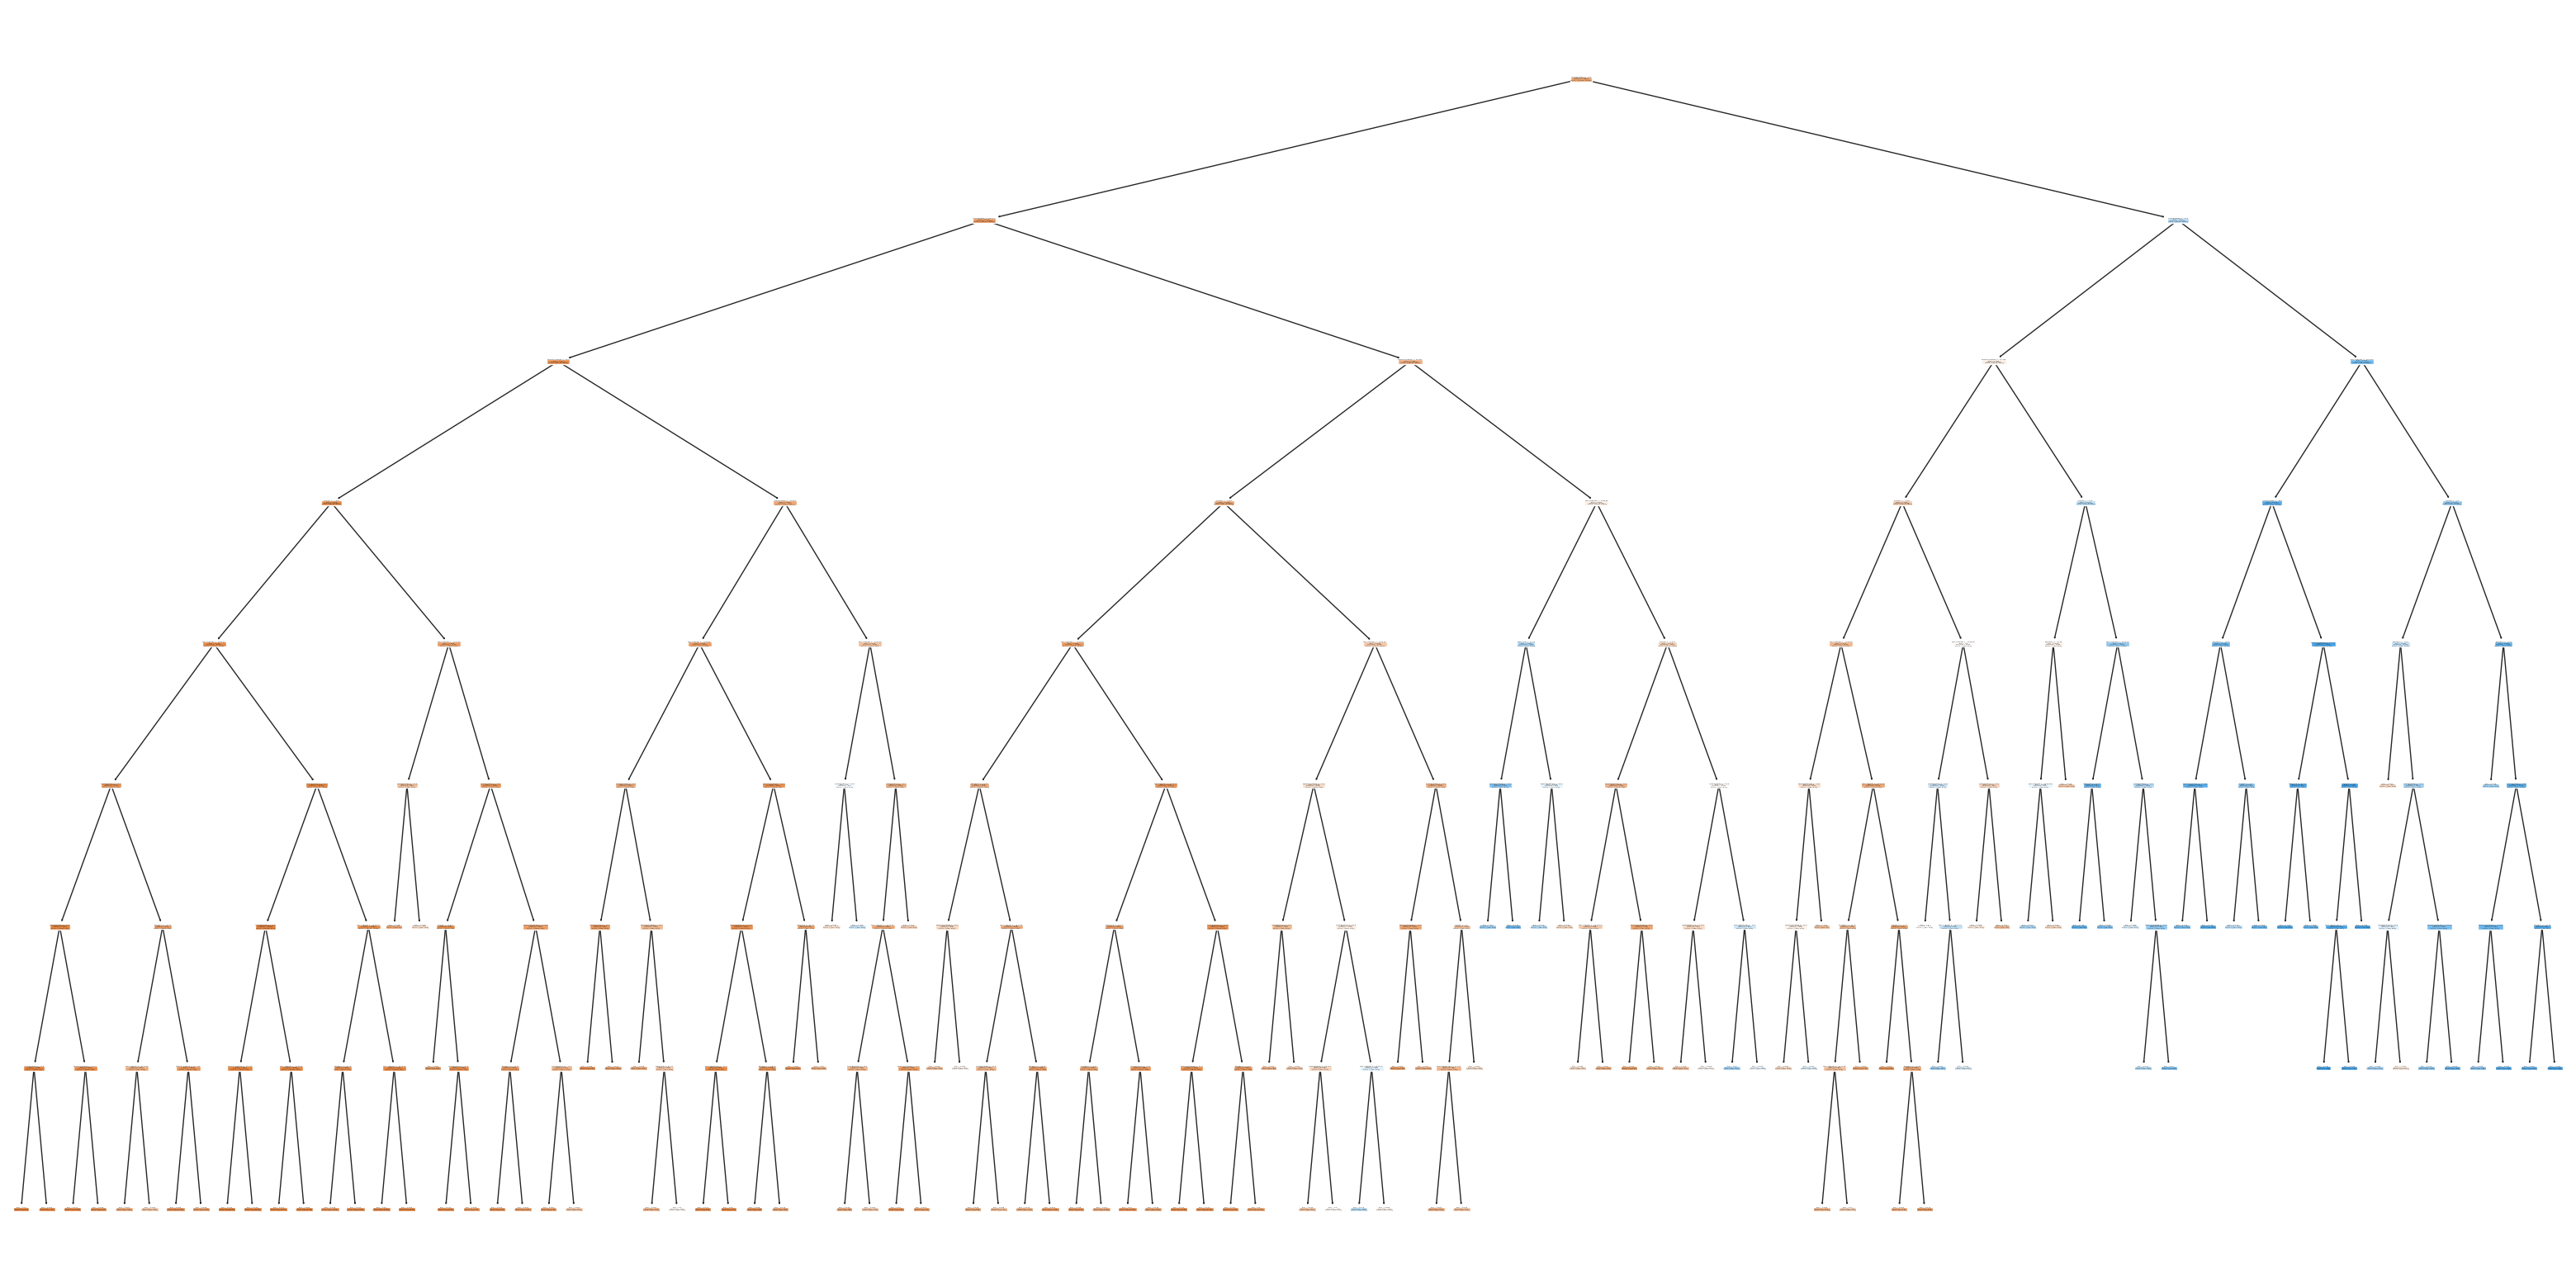

A módosított fa mélysége: 8
A módosított fa leveleinek a száma: 121


In [38]:
# a módosított döntési fa dendrogramjának kirajzolása, 
# mélységének és levelei számának lekérése

plt.figure(figsize=(40,20))  
_ = tree.plot_tree(dt_mod, feature_names = X_train.columns.tolist(), filled=True,)
plt.show()

print("A módosított fa mélysége:",dt_mod.get_depth())
print("A módosított fa leveleinek a száma:", dt_mod.get_n_leaves())

### <span style="color:green"> A módosított döntési fa teljesítményét tekintve megállapítható, hogy </span>
> 1) a ROC görbe csúcsa közelebb került (0,1) ponthoz, ami azt jelenti, hogy a modellnek jobb lett az érzékenysége és a specifikálási képessége
> 2) az AUC értékek mindkét adathalmazon magasak, ami azt jelzi, hogy a modell jól teljesít a pozitív és negatív osztályok megkülönböztetésében
> 3) az AUC értékek közötti kis különbség azt mutatja, hogy a modell már nem tanult túl, mivel a tanító és teszt adatokon hasonlóan teljesít
> 4) azonban a konfúziós mátrix és a klasszifikációs riport alapján látható, hogy a modellnek továbbra is nehézségei vannak az esős napok helyes előrejelzésében, különösen a recall tekintetében (nagyon alacsony azon valóban esős napok aránya, amikor esőt is jósol a modell)

## Egy kis elmélet a végére

A modellek elkészültével Geeky megválaszolta a múzeum feladatleadási felületén található egyéb kérdéseket is: 
- Milyen mélységű, és hány levéllel bír a két (alap + módosított) modell?
- Mi a problémája az alapmodellnek? Ezt mi alapján állapíthatjuk meg? 
- Van-e valami, amit kiemelnél a kiválasztott modellel kapcsolatban, ami esetleg hiányossága / kevésbé jól működik a modellel?

> <span style="color:green"> ezeket a kérdéseket már fentebb megválaszoltam :) </span>

Végezetül Geeky - szorgalmiként - a szabadszöveges mezőben felsorolt még néhány ötletet, amit kipróbálna még a teljesítmény javítása érdekében, vagy a jelenlegi teljesítmény jobb megértése érdekében, ha több ideje lenne. Ehhez átnézte az adatelőkészítő lépéseket is, és azt is megfontolás alá vette. 

(a kérdésekre adott válaszokat vagy kód cellában kommentként, vagy markdown cellában adjátok meg.)

### <span style="color:green"> Ötletek egy jobban teljesítő modell építéséhez </span>
> 1) az adatok előkészítése során kidobott kategórikus változókat ne dobjuk el, csupán cseréljük számértékűre őket
> 2) a 'Date' és a 'Location' oszlopkat ne kezeljük ID-ként, hanem ezeket is használjuk fel magyarázó változóként
     - a 'Location'-t egyszerűen számértékűre tudjuk cserélni, hiszen nincs sok különböző érték
     - a 'Date' oszlopban viszont túl sok a különbőző érték >> ezeket először csoportosítanám mondjuk év-hónap szerint, és aztán a csoportok elemszáma alapján adnék nekik címkéket (pl.: 0 - száraz hónapok, 1 - enyhén esős hónapok, 2 - esős hónapok)
> 3) megfigyelhető, hogy a mintánkban sokkal több a nemesős nap, mint az esős (a train és a test halmazon is) >> valamilyen undersampling/oversampling módszerrel megpróbálhatnánk kiegyensúlyozni az adatokat
> 4) próbálkozhatnánk más hiperparaméterek állítgatásával is
> 5) vaaaagy választhatnánk másfajta modellt is az előrejelzésre, merthát miért bajlódjunk egyetlen fával, amikor akár egy egész erdő is rendelkezésünkre állhat; vagy épp egy olyan algoritmus, amiben az újabb és újabb döntési fák képesek korrigálni a korábbiak hibáit

Geeky nagyon élvezte a kihívást, de úgy döntött a felmerülő további elképzeléseit most nem valósítja meg. Még sok volt hátra a múzeumból, és habár nagyon érdekesnek találja, nem szeretné átélni az "Éjszaka a múzeumban" élményt, és megtapasztalni, hogy milyen amikor az időjárás és klíma szélsőségek életre kelnek.  